In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
sub_df = pd.read_csv('submission_format.csv')
test_vals = pd.read_csv('test_set_values.csv')
train_labels = pd.read_csv('training_set_labels.csv')
train_vals = pd.read_csv('training_set_values.csv')

In [3]:
sub_df.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [4]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int64 
 1   status_group  14850 non-null  object
dtypes: int64(1), object(1)
memory usage: 232.2+ KB


In [5]:
test_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
test_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [7]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [9]:
train_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
train_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Merge Training Dataset

In [12]:
train_df = train_vals.merge(train_labels, left_on = 'id', right_on = 'id')

In [13]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Check for Duplicate IDs

In [14]:
train_df['id'].is_unique

True

## Check data

In [15]:
train_df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [16]:
train_df['ward'].value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Ukata                 1
Mkumbi                1
Nyamtinga             1
Mwanga Kaskazini      1
Chinugulu             1
Name: ward, Length: 2092, dtype: int64

In [17]:
train_df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [18]:
train_df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [19]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Dropping Columns/Rows

In [27]:
#Dropping scheme_name column due to the extensive number of missing values
#dropping columns with duplicate data
train_new = train_df.drop(['scheme_name','num_private', 'recorded_by', 'extraction_type', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 'waterpoint_type'], axis=1)

In [29]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [30]:
#drop null values 
train_new = train_new.dropna()
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48288 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     48288 non-null  int64  
 1   amount_tsh             48288 non-null  float64
 2   date_recorded          48288 non-null  object 
 3   funder                 48288 non-null  object 
 4   gps_height             48288 non-null  int64  
 5   installer              48288 non-null  object 
 6   longitude              48288 non-null  float64
 7   latitude               48288 non-null  float64
 8   wpt_name               48288 non-null  object 
 9   basin                  48288 non-null  object 
 10  subvillage             48288 non-null  object 
 11  region                 48288 non-null  object 
 12  region_code            48288 non-null  int64  
 13  district_code          48288 non-null  int64  
 14  lga                    48288 non-null  object 
 15  wa

In [33]:
train_new.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,48288.000000,48288.000000,48288.000000,48288.000000,4.828800e+04,48288.000000,48288.000000,48288.000000,48288.000000
mean,37138.591203,360.417379,701.494429,34.213824,-5.700627e+00,14.794110,5.754618,176.683048,1342.774747
std,21437.666601,2828.437040,698.811196,6.329288,2.870772e+00,17.235444,9.701979,472.505399,937.146464
min,2.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18578.750000,0.000000,0.000000,33.039487,-8.251540e+00,5.000000,2.000000,0.000000,0.000000
50%,37093.500000,0.000000,463.000000,35.212593,-4.986570e+00,12.000000,3.000000,30.000000,1987.000000
75%,55666.250000,50.000000,1335.000000,37.355583,-3.334879e+00,17.000000,5.000000,200.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


In [35]:
train_new.loc[train_new['longitude'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,Lake Victoria,...,0,submersible,user-group,unknown,unknown,dry,borehole,groundwater,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,Lake Victoria,...,0,gravity,parastatal,other,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
256,33500,0.0,2011-07-18,Hesawa,0,DWE,0.0,-2.000000e-08,Bombani,Lake Victoria,...,0,handpump,user-group,never pay,unknown,dry,borehole,groundwater,hand pump,non functional
301,70379,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nersing College,Lake Victoria,...,0,handpump,user-group,never pay,good,insufficient,borehole,groundwater,hand pump,functional
306,59713,0.0,2011-07-30,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Petro,Lake Victoria,...,0,handpump,user-group,never pay,good,insufficient,borehole,groundwater,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59135,26831,0.0,2011-08-25,Hesawa,0,Hesawa,0.0,-2.000000e-08,Bombani,Lake Victoria,...,0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional
59158,28019,0.0,2011-07-19,Wsdp,0,DWE,0.0,-2.000000e-08,Maweni,Lake Victoria,...,0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,Lake Victoria,...,0,handpump,user-group,other,good,enough,shallow well,groundwater,hand pump,functional needs repair
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,Lake Victoria,...,0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional needs repair


In [39]:
#drop the rows where Longitude is 0.
train_new = train_new.loc[train_new['longitude'] != 0]

In [38]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   date_recorded          46962 non-null  object 
 3   funder                 46962 non-null  object 
 4   gps_height             46962 non-null  int64  
 5   installer              46962 non-null  object 
 6   longitude              46962 non-null  float64
 7   latitude               46962 non-null  float64
 8   wpt_name               46962 non-null  object 
 9   basin                  46962 non-null  object 
 10  subvillage             46962 non-null  object 
 11  region                 46962 non-null  object 
 12  region_code            46962 non-null  int64  
 13  district_code          46962 non-null  int64  
 14  lga                    46962 non-null  object 
 15  wa

In [40]:
train_new.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000
mean,37115.876198,370.593978,721.301542,35.179871,-5.861588,14.705123,5.834547,181.671798,1380.688791
std,21443.914412,2867.433657,698.454483,2.684188,2.744181,17.468023,9.818294,478.183092,922.330278
min,2.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,0.000000
25%,18560.250000,0.000000,0.000000,33.196012,-8.410366,5.000000,2.000000,0.000000,0.000000
50%,37060.500000,0.000000,530.500000,35.353205,-5.108867,11.000000,3.000000,40.000000,1989.000000
75%,55665.750000,50.000000,1348.000000,37.404240,-3.375047,17.000000,5.000000,210.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-0.998464,99.000000,80.000000,30500.000000,2013.000000


In [99]:
train_new

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,1996,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,...,2007,submersible,user-group,monthly,good,enough,borehole,groundwater,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,...,1999,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,...,1996,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,...,1996,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional


In [42]:
train_df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [46]:
#Find the mean of the construction year of the dataset excluding construction year 0 
train_new.loc[train_df['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000
mean,37051.645983,515.806547,1017.578049,35.985533,-6.308962,14.984387,6.162935,257.543990,1996.732886
std,21412.047084,3237.707602,618.436186,2.654443,2.668991,20.351304,10.879739,548.408907,12.604326
min,3.000000,0.000000,-63.000000,29.607122,-11.649440,2.000000,1.000000,0.000000,1960.000000
25%,18452.000000,0.000000,404.000000,34.683623,-8.789443,4.000000,2.000000,25.000000,1986.000000
50%,37025.000000,0.000000,1146.000000,36.776345,-6.126406,10.000000,3.000000,130.000000,2000.000000
75%,55482.000000,250.000000,1495.000000,37.884817,-3.783045,16.000000,5.000000,300.000000,2008.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-1.104943,99.000000,63.000000,30500.000000,2013.000000


In [93]:
#Replace 0 values in construction_year with the mean of 1997
train_new['construction_year'].replace(to_replace = 0, value = 1997, inplace=True)

In [94]:
train_new.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000
mean,37115.876198,370.593978,721.301542,35.179871,-5.861588,14.705123,5.834547,181.671798,1996.506771
std,21443.914412,2867.433657,698.454483,2.684188,2.744181,17.468023,9.818294,478.183092,10.486531
min,2.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,1960.000000
25%,18560.250000,0.000000,0.000000,33.196012,-8.410366,5.000000,2.000000,0.000000,1994.000000
50%,37060.500000,0.000000,530.500000,35.353205,-5.108867,11.000000,3.000000,40.000000,1996.000000
75%,55665.750000,50.000000,1348.000000,37.404240,-3.375047,17.000000,5.000000,210.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-0.998464,99.000000,80.000000,30500.000000,2013.000000


In [95]:
train_new

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,...,1996,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,...,2007,submersible,user-group,monthly,good,enough,borehole,groundwater,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,...,1999,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,...,1996,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,...,1996,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional


In [112]:
train_new['installer'].value_counts()

DWE                      13879
Government                1283
RWE                       1007
Commu                      893
KKKT                       884
                         ...  
M                            1
Rotary club Australia        1
PIUS CHARLES                 1
ANSWAR                       1
DAWE                         1
Name: installer, Length: 1757, dtype: int64

# FOR TREE

In [55]:
tree_train = train_new.drop(['id', 'date_recorded'], axis=1)

In [101]:
tree_train

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
5,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,Tanga,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
6,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,...,1996,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,500.0,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,Morogoro,...,2007,submersible,user-group,monthly,good,enough,borehole,groundwater,communal standpipe,non functional
59395,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,...,1999,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,...,1996,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional
59398,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,...,1996,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional


In [70]:
tree_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             46962 non-null  float64
 1   funder                 46962 non-null  object 
 2   gps_height             46962 non-null  int64  
 3   installer              46962 non-null  object 
 4   longitude              46962 non-null  float64
 5   latitude               46962 non-null  float64
 6   wpt_name               46962 non-null  object 
 7   basin                  46962 non-null  object 
 8   subvillage             46962 non-null  object 
 9   region                 46962 non-null  object 
 10  region_code            46962 non-null  int64  
 11  district_code          46962 non-null  int64  
 12  lga                    46962 non-null  object 
 13  ward                   46962 non-null  object 
 14  population             46962 non-null  int64  
 15  pu

In [74]:
tree_train.nunique()

amount_tsh                  91
funder                    1555
gps_height                2426
installer                 1757
longitude                46915
latitude                 46917
wpt_name                 30514
basin                        9
subvillage               15645
region                      21
region_code                 27
district_code               18
lga                        116
ward                      1806
population                 991
public_meeting               2
scheme_management           12
permit                       2
construction_year           54
extraction_type_class        7
management_group             5
payment_type                 7
quality_group                6
quantity                     5
source_type                  7
source_class                 3
waterpoint_type_group        6
status_group                 3
dtype: int64

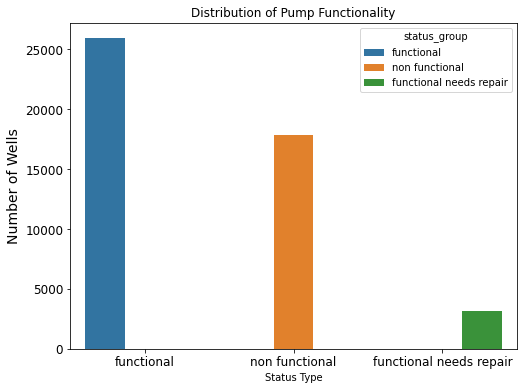

In [81]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', hue="status_group", data=tree_train)

plt.title('Distribution of Pump Functionality')
plt.xlabel('Status Type')
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()

# Test Tree

In [57]:
X = tree_train.drop('status_group', axis=1)
y = tree_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Danida'

In [68]:
train_df_clean = train_df.drop('scheme_name', axis=1).dropna()    # Remove nan

dt_mini_df = train_df_clean[['construction_year', 'waterpoint_type', 'quantity', 'water_quality', 'extraction_type', 'management', 'permit', 'basin', 'status_group']]

dt_mini_df = dt_mini_df.loc[dt_mini_df.construction_year != 0]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity', 'management', 'permit', 'basin'])


X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.7737630876616711

In [92]:
df1 = tree_train[['population', 'waterpoint_type_group', 'quality_group', 'extraction_type_class', 'status_group']]

df1 = pd.get_dummies(df1, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class'])


X = df1.drop('status_group', axis=1)
y = df1['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.50)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.647693399574166

## 1st Simple Model

In [ ]:
mini_df = train_df[['population', 'status_group']]

mini_df['population'] = mini_df['population'].astype('float64')

In [ ]:
X = mini_df.drop('status_group', axis=1)
y = mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
pd.set_option('display.max_columns', None)

## 2nd Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = train_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

# Test

In [60]:
df = train_df.drop(['date_recorded','num_private'], axis=1)
df

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [61]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Wsdp'

In [63]:
train_df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [64]:
train_df['scheme_name'].isnull().sum()

28166

In [65]:
train_df['scheme_name']

0                              Roman
1                                NaN
2        Nyumba ya mungu pipe scheme
3                                NaN
4                                NaN
                    ...             
59395         Losaa Kia water supply
59396    Ikondo electrical water sch
59397                            NaN
59398                            NaN
59399                            NaN
Name: scheme_name, Length: 59400, dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   basin                  59400 non-null  object 
 9   subvillage             59029 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [96]:
tree_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             46962 non-null  float64
 1   funder                 46962 non-null  object 
 2   gps_height             46962 non-null  int64  
 3   installer              46962 non-null  object 
 4   longitude              46962 non-null  float64
 5   latitude               46962 non-null  float64
 6   wpt_name               46962 non-null  object 
 7   basin                  46962 non-null  object 
 8   subvillage             46962 non-null  object 
 9   region                 46962 non-null  object 
 10  region_code            46962 non-null  int64  
 11  district_code          46962 non-null  int64  
 12  lga                    46962 non-null  object 
 13  ward                   46962 non-null  object 
 14  population             46962 non-null  int64  
 15  pu

In [105]:
#Create an interactive map of homes
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement

#Create a blank map
map = folium.Map(location=[tree_train.latitude.mean(), 
                           tree_train.longitude.mean()], zoom_start=6, control_scale=True)

map

In [ ]:
#Create an interactive map of homes
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement

#Create a blank map
map = folium.Map(location=[train_new.latitude.mean(), 
                           train_new.longitude.mean()], zoom_start=6, control_scale=True)

#Index markers for homes Out of Seattle
for index, location_info in train_new.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)


map

In [106]:
train_new.longitude[train_df.longitude != 34.938093][0]

34.93809275

In [107]:
train_new.loc[train_new.longitude != 0]['longitude'].value_counts()

37.541579    2
32.967009    2
33.090347    2
33.006275    2
37.532778    2
            ..
37.422486    1
33.990412    1
32.956619    1
36.866855    1
35.005922    1
Name: longitude, Length: 46915, dtype: int64